<a href="https://colab.research.google.com/github/ahmadfadhilnugraha/Zuber/blob/main/Sprint_6_Zuber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zuber - Passenger Preferences and the Influence of Weather on Travel

## Content

1. [Data Preprocessing](#data-preprocessing)

   1.1. [Importing Libraries](#importing-libraries)

   1.2. [Data Scraping](#data-scraping)

   1.3. [SQL Data Exploration](#sql-data-exploration)

   1.4. [Reading, and Checking Data Files](#reading-and-checking-data-files)

   1.5. [Data Exploration](#data-exploration)

2. [Data Analysis](#data-analysis)

   2.1. [Identifying the top 10 regions used as delivery points](#identifying-the-top-10-regions-used-as-delivery-points)

   2.2. [Trip Counts each Taxi Companies](#trip-counts-each-taxi-companies)

3. [Hypothesis Testing](#hypothesis-testing)

4. [Conclusion](#conclusion)



## Introduction

In this project, I am acting as an analyst for Zuber, a new ride-sharing company launched in Chicago. The main goal of this project is to understand passenger preferences and the impact of external factors on travel. Using a database, I will analyze data from competitors and test hypotheses related to the influence of weather on travel frequency.

## Goal

- Identifying the top 10 regions used as delivery points
- Analyzing taxi companies and their trip counts
- Testing the hypothesis "Average trip duration from the Loop to O'Hare International Airport changes when it rains on Saturdays."

## Step

1. Writing a code to scrape weather data in Chicago for November 2017 from the website: https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html
2. Initial Exploratory Data Analysis (***Notes: this step has been completed using SQL***)
3. Data Type Correction
4. Advanced Exploratory Data Analysis
5. Hypothesis Testing

## Data Description

**Database containing taxi trip information in Chicago:**
  - **Table neighborhoods:**
      - **name:** name of the area
      - **neighborhood_id:** area code
  - **Table cabs:**
      - **cab_id:** vehicle code
      - **vehicle_id:** technical ID of the vehicle
      - **company_name:** name of the company owning the vehicle   
  - **Table trips:**
      - **trip_id:** trip code
      - **cab_id:** code of the operating vehicle
      - **start_ts:** date and time trip started (time rounded to the nearest hour)
      - **end_ts:** date and time trip ended (time rounded to the nearest hour)
      - **duration_seconds:** duration of the trip in seconds
      - **distance_miles:** distance of the trip in miles
      - **pickup_location_id:** pickup area code
      - **dropoff_location_id:** dropoff area code
  - **Table weather_records:**
      - **record_id:** weather record code
      - **ts:** date and time when weather recording was taken (time rounded to the nearest hour)
      - **temperature:** temperature at the time of weather recording
      - **description:** brief description of weather conditions, such as "light rain" or "scattered clouds."






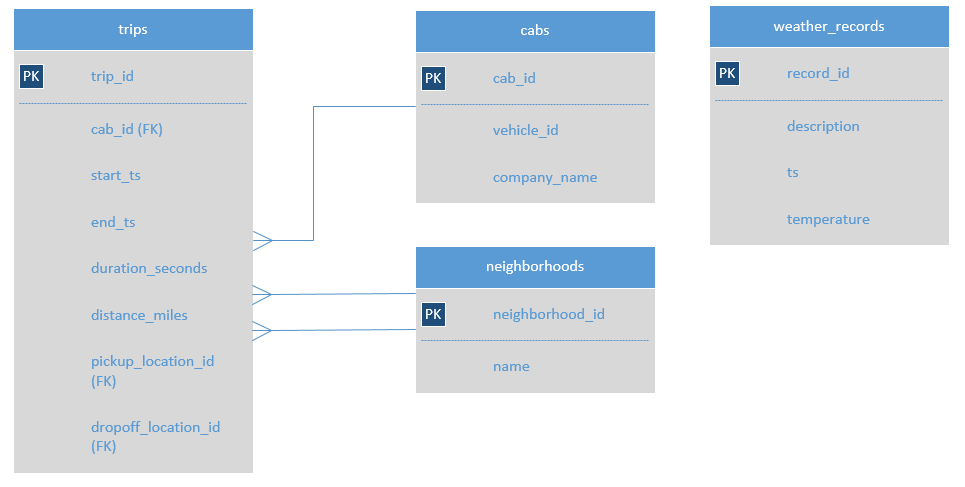

## 1. Data Preprocessing

### 1.1. Importing Libraries

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

### 1.2. Data Scraping

Scrape weather data in Chicago for November 2017. The result will become weather_records table

In [ ]:
URL='https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table', attrs={"id": "weather_records"})
heading_table=[]
for row in table.find_all('th'):
    heading_table.append(row.text)
content=[]
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])
weather_records = pd.DataFrame(content, columns = heading_table)
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


### 1.3. SQL Data Exploration

To obtain data for analysis with Python, I first use SQL to perform data exploration. Here are the steps I take in SQL.

**1. Find the number of taxi trips for each taxi company on November 15-16, 2017. Name the resulting column as trips_amount and display this column along with the company_name column. Sort the result in descending order based on trips_amount.**

In [ ]:
'''
SELECT
    cabs.company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM
    cabs
    INNER JOIN
    trips
    ON
    trips.cab_id = cabs.cab_id
WHERE
    CAST(trips.start_ts AS date) BETWEEN '2017-11-15' AND '2017-11-16'
GROUP BY
    company_name
ORDER BY
    trips_amount DESC;
'''

"\nSELECT\n    cabs.company_name,\n    COUNT(trips.trip_id) AS trips_amount\nFROM\n    cabs\n    INNER JOIN\n    trips\n    ON\n    trips.cab_id = cabs.cab_id\nWHERE\n    CAST(trips.start_ts AS date) BETWEEN '2017-11-15' AND '2017-11-16'\nGROUP BY\n    company_name\nORDER BY\n    trips_amount DESC;\n"

**2. Find the number of trips for each taxi company whose name includes the words "Yellow" or "Blue" on November 1-7, 2017. Name the resulting variable as trips_amount. Group the result by the company_name column.**

In [ ]:
'''
SELECT
    cabs.company_name as company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM
    cabs
INNER JOIN
    trips
ON
    trips.cab_id = cabs.cab_id
WHERE
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
    AND cabs.company_name LIKE '%%Yellow%%'
GROUP BY company_name
UNION ALL
SELECT
    cabs.company_name as company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM
    cabs
INNER JOIN
    trips
ON
    trips.cab_id = cabs.cab_id
WHERE
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
    AND cabs.company_name LIKE '%%Blue%%'
GROUP BY company_name;\
'''

"\nSELECT\n    cabs.company_name as company_name,\n    COUNT(trips.trip_id) AS trips_amount\nFROM\n    cabs\nINNER JOIN\n    trips\nON\n    trips.cab_id = cabs.cab_id\nWHERE\n    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'\n    AND cabs.company_name LIKE '%%Yellow%%'\nGROUP BY company_name\nUNION ALL\nSELECT\n    cabs.company_name as company_name,\n    COUNT(trips.trip_id) AS trips_amount\nFROM\n    cabs\nINNER JOIN\n    trips\nON\n    trips.cab_id = cabs.cab_id\nWHERE\n    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'\n    AND cabs.company_name LIKE '%%Blue%%'\nGROUP BY company_name;"

**3. In November 2017, the most popular taxi companies were Flash Cab and Taxi Affiliation Services. Find the number of trips for these two companies and name the resulting variable as trips_amount. Combine trips from all other companies into one group: "Other". Group the data by the taxi company name. Name the column containing the taxi company names as company. Sort the result in descending order based on trips_amount.**


In [ ]:
'''
SELECT
    CASE
        WHEN company_name = 'Flash Cab' THEN 'Flash Cab'
        WHEN company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'
        ELSE 'Other'
    END AS company,
    COUNT(trips.trip_id) as trips_amount
FROM
    cabs
INNER JOIN
    trips
ON
    trips.cab_id = cabs.cab_id
WHERE
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
GROUP BY
    company
ORDER BY
    trips_amount DESC;
'''

"\nSELECT\n    CASE\n        WHEN company_name = 'Flash Cab' THEN 'Flash Cab'\n        WHEN company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'\n        ELSE 'Other'\n    END AS company,\n    COUNT(trips.trip_id) as trips_amount\nFROM\n    cabs\nINNER JOIN\n    trips\nON\n    trips.cab_id = cabs.cab_id\nWHERE\n    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'\nGROUP BY\n    company\nORDER BY\n    trips_amount DESC;\n"

**4. Retrieve data about the O'Hare and Loop neighborhood IDs from the neighborhoods table.**

In [ ]:
'''
SELECT
    neighborhood_id,
    name
FROM
    neighborhoods
WHERE
    name LIKE '%Hare' OR name LIKE 'Loop'
'''

"\nSELECT\n    neighborhood_id,\n    name\nFROM\n    neighborhoods\nWHERE\n    name LIKE '%Hare' OR name LIKE 'Loop'\n"

**5. For each hour, retrieve weather condition records from the weather_records table. Using the CASE operator, divide all hours into two groups: "Bad" if the description column contains the word "rain" or "storm", and "Good" for the rest that do not contain these words. Name the resulting column as weather_conditions. The final table should contain two columns: date and time (ts), and weather_conditions.**

In [ ]:
'''
SELECT
    ts,
    CASE
        WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
        ELSE 'Good'
    END AS weather_conditions
FROM
    weather_records;
'''

"\nSELECT\n    ts,\n    CASE\n        WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'\n        ELSE 'Good'\n    END AS weather_conditions\nFROM\n    weather_records;\n"

**6. Retrieve from the trips table data of all trips starting from the Loop area (neighborhood_id: 50) and ending in the O'Hare area (neighborhood_id: 63) on Saturdays. Get the weather conditions for each trip. Use the method you applied in the previous task. Also, retrieve the duration for each trip. Ignore trips where weather condition data is not available.**

In [ ]:
'''
SELECT
    start_ts,
    T.weather_conditions,
    duration_seconds
FROM
    trips
INNER JOIN (
    SELECT
        ts,
        CASE
            WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'
            ELSE 'Good'
        END AS weather_conditions
    FROM
        weather_records
) T on T.ts = trips.start_ts
WHERE
    pickup_location_id = 50 AND dropoff_location_id = 63 AND EXTRACT (DOW from trips.start_ts) = 6
ORDER BY trip_id
'''

"\nSELECT\n    start_ts,\n    T.weather_conditions,\n    duration_seconds\nFROM\n    trips\nINNER JOIN (\n    SELECT\n        ts,\n        CASE\n            WHEN description LIKE '%rain%' OR description LIKE '%storm%' THEN 'Bad'\n            ELSE 'Good'\n        END AS weather_conditions\n    FROM\n        weather_records\n) T on T.ts = trips.start_ts\nWHERE\n    pickup_location_id = 50 AND dropoff_location_id = 63 AND EXTRACT (DOW from trips.start_ts) = 6\nORDER BY trip_id\n"

After this process, we have 3 new datasets.
1. project_sql_result_01.csv. This file contains the following data:
    - company_name: the name of the taxi company
    - trips_amount: the number of trips for each taxi company on November 15-16, 2017.
2. project_sql_result_04.csv. This file contains the following data:
    - dropoff_location_name: the name of the neighborhood in Chicago where the trip ends
    - average_trips: the average number of trips ending in each neighborhood in November 2017.
3. project_sql_result_07.csv - the result of the last query. This file contains trip data from the Loop to O'Hare International Airport. Remember, here are the values ​​of the columns in this table:
    - start_ts -- date and time of pickup
    - weather_conditions -- weather conditions at the start of the trip
    - duration_seconds -- trip duration in seconds

### 1.4. Reading, and Checking Data Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DS/SPRINT_6/project_sql_result_01.csv')
df4 = pd.read_csv('/content/drive/MyDrive/DS/SPRINT_6/project_sql_result_04.csv')
df7 = pd.read_csv('/content/drive/MyDrive/DS/SPRINT_6/project_sql_result_07.csv')

### 1.5. Data Exploration

In [ ]:
def inspect_df(df):
  print(df.info())
  display(df.head())

In [ ]:
dataframes = [
    ("project SQL result 01", df1),
    ("project SQL result 04", df4),
    ("project SQL result 07", df7)
]

for df_name, df in dataframes:
  print(f"{'-' * 30}\n{df_name}\n{'-' * 30}")
  inspect_df(df)
  print("\n")

------------------------------
project SQL result 01
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299




------------------------------
project SQL result 04
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000




------------------------------
project SQL result 07
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:
for df_name, df in dataframes:
    print(f"{'-' * 30}\n{df_name}\n{'-' * 30}")
    display(df.describe())
    print("\n")

------------------------------
project SQL result 01
------------------------------


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000




------------------------------
project SQL result 04
------------------------------


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667




------------------------------
project SQL result 07
------------------------------


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


We have 3 explored datasets and no anomalies were found in any of them, indicating that the data can be used for analysis quite effectively.

## 2. Data Analysis

### 2.1. Data Analysis - Identifying the top 10 regions used as delivery points

In [ ]:
top_region = df4.sort_values(by = 'average_trips',  ascending = False).head(10)
top_region

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<Figure size 1000x600 with 0 Axes>

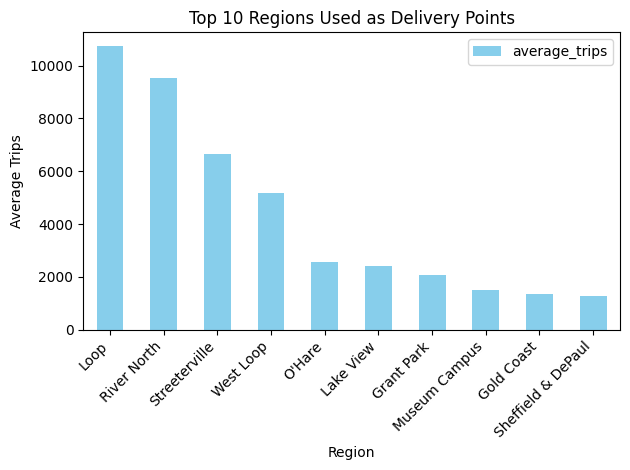

In [ ]:
plt.figure(figsize=(10, 6))
top_region.plot(x='dropoff_location_name', kind='bar', color='skyblue')
plt.title('Top 10 Regions Used as Delivery Points')
plt.xlabel('Region')
plt.ylabel('Average Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The data summarizes the average number of trips ending in various neighborhoods in Chicago. On average, the Loop neighborhood has the highest number of trips with 10,727.47, followed by River North with 9,523.67 trips, Streeterville with 6,664.67 trips, and West Loop with 5,163.67 trips. O'Hare sees an average of 2,546.90 trips, while Lake View has 2,420.97 trips on average. Grant Park records an average of 2,068.53 trips, Museum Campus has 1,510.00 trips on average, and Gold Coast sees an average of 1,364.23 trips. Finally, Sheffield & DePaul neighborhood has an average of 1,259.77 trips.

### 2.2. Data Analysis - Trip Counts each Taxi Companies

In [ ]:
# Sort the DataFrame by trips_amount
df1_sorted = df1.sort_values(by='trips_amount', ascending=False)
df1_sorted

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


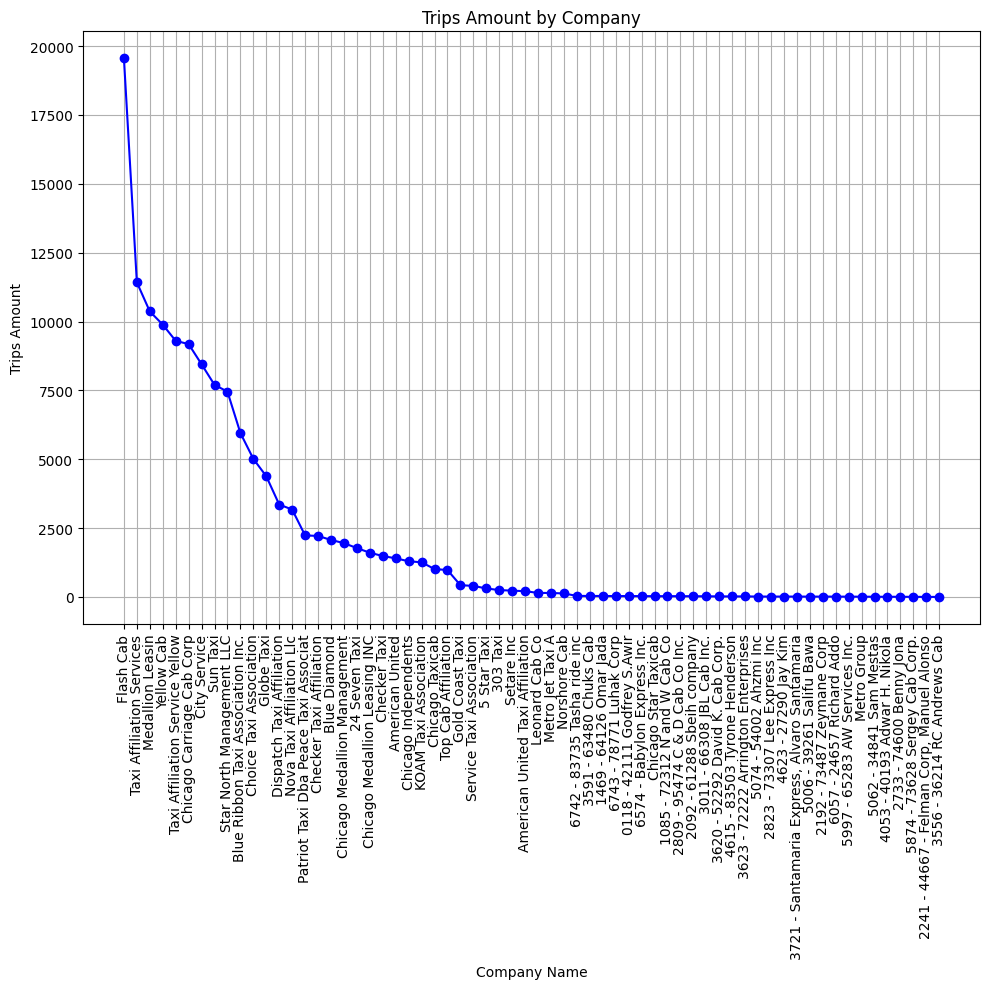

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(df1_sorted['company_name'], df1_sorted['trips_amount'], marker='o', color='b', linestyle='-')
plt.title('Trips Amount by Company')
plt.xlabel('Company Name')
plt.ylabel('Trips Amount')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df1_sorted = df1.sort_values(by='trips_amount', ascending=False)
head = df1_sorted.head(10)
head

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


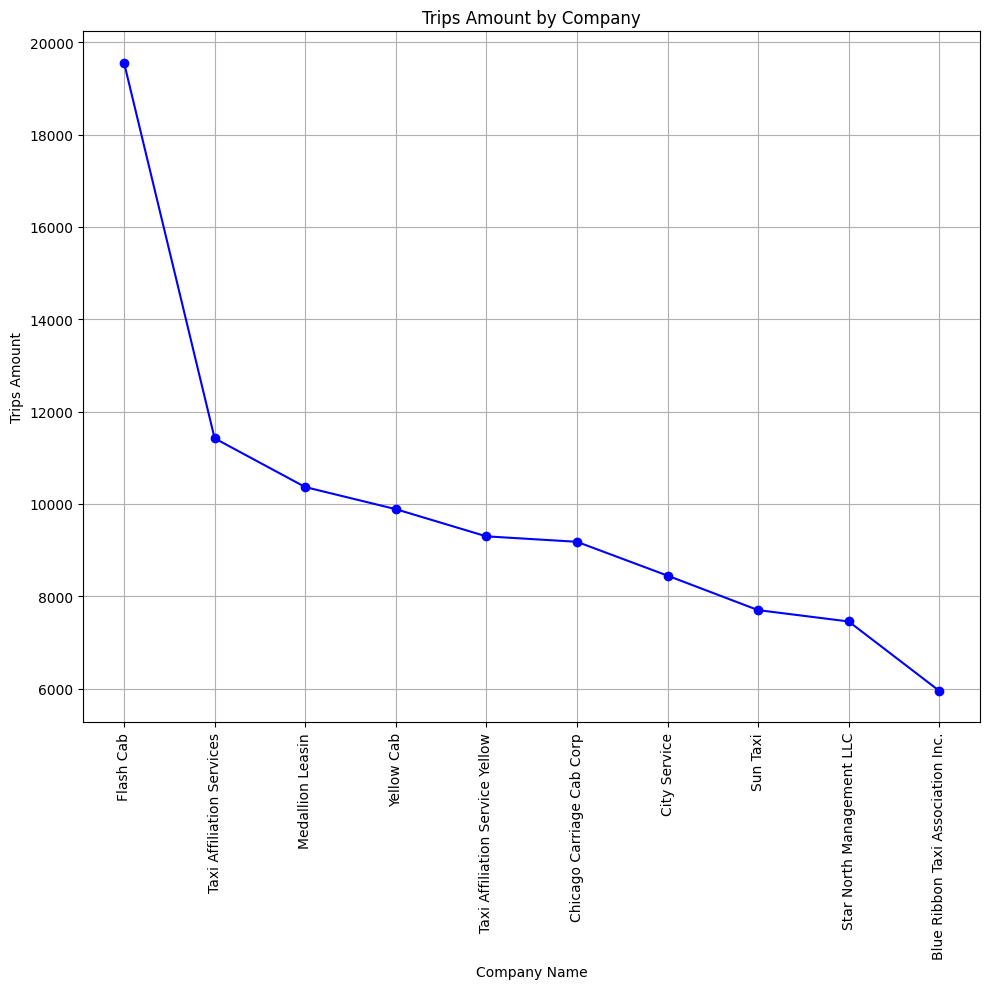

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(head['company_name'], head['trips_amount'], marker='o', color='b', linestyle='-')
plt.title('Trips Amount by Company')
plt.xlabel('Company Name')
plt.ylabel('Trips Amount')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


The data presents the number of trips for various taxi companies. Flash Cab leads with 19,558 trips, followed by Taxi Affiliation Services with 11,422 trips and Medallion Leasin with 10,367 trips. Yellow Cab and Taxi Affiliation Service Yellow closely follow with 9,888 and 9,299 trips respectively. Chicago Carriage Cab Corp and City Service each have around 9,000 trips, while Sun Taxi and Star North Management LLC have 7,701 and 7,455 trips respectively. Blue Ribbon Taxi Association Inc. concludes the list with 5,953 trips.

## 3. Hypothesis Testing

The null hypothesis typically states that something being tested is equal, thus the values are:

H0: The average trip duration from the Loop to O'Hare International Airport is the same on rainy Saturdays.

H1: The average trip duration from the Loop to O'Hare International Airport is not the same on rainy Saturdays.

The hypothesis testing criterion I am using is a test of means for 2 populations because the samples are from 2 different populations.

In [ ]:
rain = df7.query('weather_conditions == "Bad"')['duration_seconds'].reset_index()
sunny = df7.query('weather_conditions == "Good"')['duration_seconds'].reset_index()

In [ ]:
np.var(rain['duration_seconds']), np.var(sunny['duration_seconds'])

(517403.56330246915, 575732.9308497686)

In [ ]:
st.levene(rain['duration_seconds'], sunny['duration_seconds'])

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

In [ ]:
t_statistic, p_value = st.ttest_ind(rain['duration_seconds'], sunny['duration_seconds'], equal_var = True)

alpha = 0.05

print("Two-Sample T-Test Results:")
print(f"  Test Statistic: {t_statistic}")
print(f"  p-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Conclusion: There is sufficient evidence to suggest that The average trip duration from the Loop to O'Hare International Airport is the same on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to suggest that The average trip duration from the Loop to O'Hare International Airport is the same on rainy Saturdays.")

Two-Sample T-Test Results:
  Test Statistic: 6.946177714041499
  p-value: 6.517970327099473e-12
Reject the null hypothesis.
Conclusion: There is sufficient evidence to suggest that The average trip duration from the Loop to O'Hare International Airport is the same on rainy Saturdays.


## 4. Conclusion

Based on the analysis conducted, several conclusions can be drawn. Firstly, the top 10 destinations frequently visited by taxi passengers include Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul. Secondly, the leading taxi companies based on the highest number of trips are Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC, and Blue Ribbon Taxi Association Inc. Flash Cab stands out as the market leader due to its substantial customer base compared to competitors. Lastly, the analysis indicates that the average trip duration from the Loop to O'Hare International Airport varies on rainy Saturdays. These insights provide valuable information about popular destinations, market dynamics, and the influence of weather on travel patterns.